<a href="https://colab.research.google.com/github/PRaliphada/Pfarelo/blob/main/research_project_final_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vaderSentiment

In [3]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

# NewscatcherAPI key
newscatcher_api_key = 'VW9dbNuM7_mnY4Y3_pk2oTIaEmjw1_Th9av2zGaKP7c'

# Broader financial queries related to U.S. Treasury bonds
queries = [
    # U.S. Financial Queries
    'U.S. Treasury',
    'Treasury Bonds',
    'Bond Market',
    'Government Bonds',
    'U.S. Treasury Notes',
    'U.S. Treasury Bills',
    'Corporate Bonds',
    'Municipal Bonds',
    'Bond Yields',
    'Bond Interest Rates',
    'Fixed-Income Securities',
    'Federal Reserve Bonds',
    'Inflation-Linked Bonds',
    'Long-Term Bonds',
    'Short-Term Bonds',
    'Bond Auctions',
    'Treasury Bond Rates',
    'Treasury Securities',
    'Sovereign Debt',
    'Yield Curve',
    'Treasury Inflation-Protected Securities (TIPS)',
    'U.S. Debt Market',
    'Coupon Bonds',
    'Bond Maturity Dates',
    'U.S. Treasury Issuances',
    'Debt Instruments',
    'Bond Trading',
    'Secondary Bond Market',
    'U.S. National Debt',
    'Treasury Bond Investments',
    'Interest Rate Risk in Bonds',

    # UK Financial Queries
    'UK Treasury',
    'UK Government Bonds',
    'Gilt Bonds',
    'Corporate Bonds UK',
    'UK Bond Market',
    'UK Inflation-Linked Bonds',
    'UK Debt Instruments',
    'UK Sovereign Debt',
    'Bank of England Bonds',
    'UK Bond Yields',
    'UK Treasury Notes',
    'UK Treasury Bills',
    'UK National Debt',
    'UK Fixed-Income Securities',
    'UK Bond Auctions',
    'UK Yield Curve',
    'Long-Term UK Bonds',
    'Short-Term UK Bonds',
    'UK Bond Interest Rates',
    'UK Debt Market',

    # South Africa Financial Queries
    'South African Treasury',
    'South African Government Bonds',
    'Rand-Denominated Bonds',
    'Corporate Bonds South Africa',
    'South African Bond Market',
    'Inflation-Linked Bonds South Africa',
    'South African Sovereign Debt',
    'Reserve Bank of South Africa Bonds',
    'South African Bond Yields',
    'South African Debt Instruments',
    'South African Treasury Notes',
    'South African Treasury Bills',
    'South African National Debt',
    'South African Fixed-Income Securities',
    'South African Bond Auctions',
    'South African Yield Curve',
    'Long-Term South African Bonds',
    'Short-Term South African Bonds',
    'South African Bond Interest Rates',
    'South African Debt Market'
]


# Set up VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    # Check if text is None, and return 'Neutral' if it is
    if text is None:
        return 'Neutral'
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


# Function to get news articles from NewscatcherAPI
def get_news(query, api_key, start_date, end_date, num_articles=100):
    url = f'https://api.newscatcherapi.com/v2/search?q={query}&lang=en&from={start_date}&to={end_date}&page_size={num_articles}'
    headers = {
        'x-api-key': api_key
    }
    response = requests.get(url, headers=headers)
    data = response.json()

    if response.status_code != 200:
        print(f"Error fetching data for query '{query}': {data.get('message')}")
        return []

    news_data = []
    articles = data.get('articles', [])
    for article in articles:
        news_content = article.get('summary') if article.get('summary') else article.get('excerpt')
        sentiment = get_sentiment(news_content)
        news_data.append([article['clean_url'], query, sentiment, news_content])

    return news_data

# Define your date range
start_date = '2023-10-01'
end_date = '2024-10-01'

# Store all news data
all_news = []

for query in queries:
    all_news.extend(get_news(query, newscatcher_api_key, start_date, end_date))

# Check if any news was retrieved
if not all_news:
    print("No news articles were retrieved. Try broadening your queries or checking the API key.")
else:
    # Create a DataFrame
    df = pd.DataFrame(all_news, columns=['Source', 'Entity', 'Sentiment', 'News Content'])

    # Split the data into training and validation sets
    train, validation = train_test_split(df, test_size=0.2, random_state=42)

    # Save to CSV
    train.to_csv('financial_news_bonds_sentiment_train.csv', index=False)
    validation.to_csv('financial_news_bonds_sentiment_val.csv', index=False)

    # Print the first few rows of the training and validation sets
    print("Training Set:")
    print(train.head())

    print("\nValidation Set:")
    print(validation.head())


Training Set:
                       Source                     Entity Sentiment  \
3248  inverness-courier.co.uk        UK Government Bonds  Negative   
181         globenewswire.com             Treasury Bonds  Positive   
3601           headtopics.com  UK Inflation-Linked Bonds  Positive   
794          etfdailynews.com            Municipal Bonds  Positive   
3362             swissinfo.ch                 Gilt Bonds  Positive   

                                           News Content  
3248  html\n \n \n \n \n \nClick here to sign up to ...  
181   On the Auction Date, between 10:30 am and 11:0...  
3601  Amundi US TIPS Government Inflation-Linked Bon...  
794   PBMares Wealth Management LLC boosted its stak...  
3362  By David Milliken\nLONDON (Reuters) – Britain ...  

Validation Set:
               Source                        Entity Sentiment  \
4977  dailymail.co.uk        UK Bond Interest Rates  Negative   
3305       nasdaq.com                    Gilt Bonds  Positive   
4391 

In [5]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'News Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'News Content'], keep='first')

duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'News Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'News Content'], keep='first')

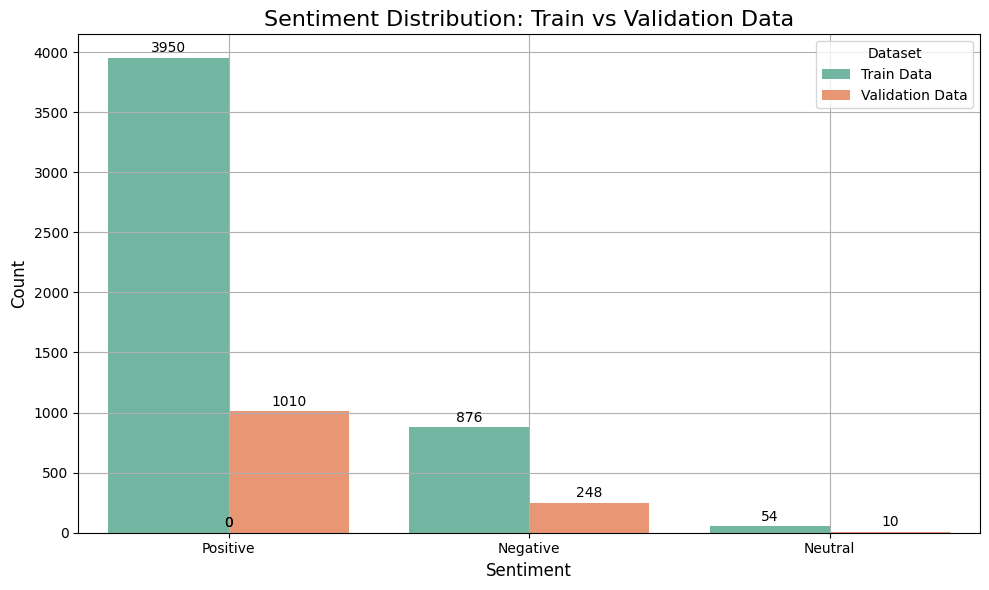

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment counts for train and validation data
train_sentiment_counts = train['Sentiment'].value_counts().rename('Train Data')
validation_sentiment_counts = validation['Sentiment'].value_counts().rename('Validation Data')

# Combine counts into a DataFrame
combined_sentiment_counts = pd.DataFrame({
    'Train Data': train_sentiment_counts,
    'Validation Data': validation_sentiment_counts
})

# Fill missing values with 0
combined_sentiment_counts.fillna(0, inplace=True)

# Reset index to prepare for plotting
combined_sentiment_counts.reset_index(inplace=True)
combined_sentiment_counts.rename(columns={'index': 'Sentiment'}, inplace=True)

# Melt the DataFrame for easier plotting with seaborn
combined_sentiment_counts_melted = combined_sentiment_counts.melt(id_vars='Sentiment',
                                                                  var_name='Dataset',
                                                                  value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Sentiment', y='Count', hue='Dataset', data=combined_sentiment_counts_melted, palette="Set2")

# Add count values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)

# Add title and labels
plt.title('Sentiment Distribution: Train vs Validation Data', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


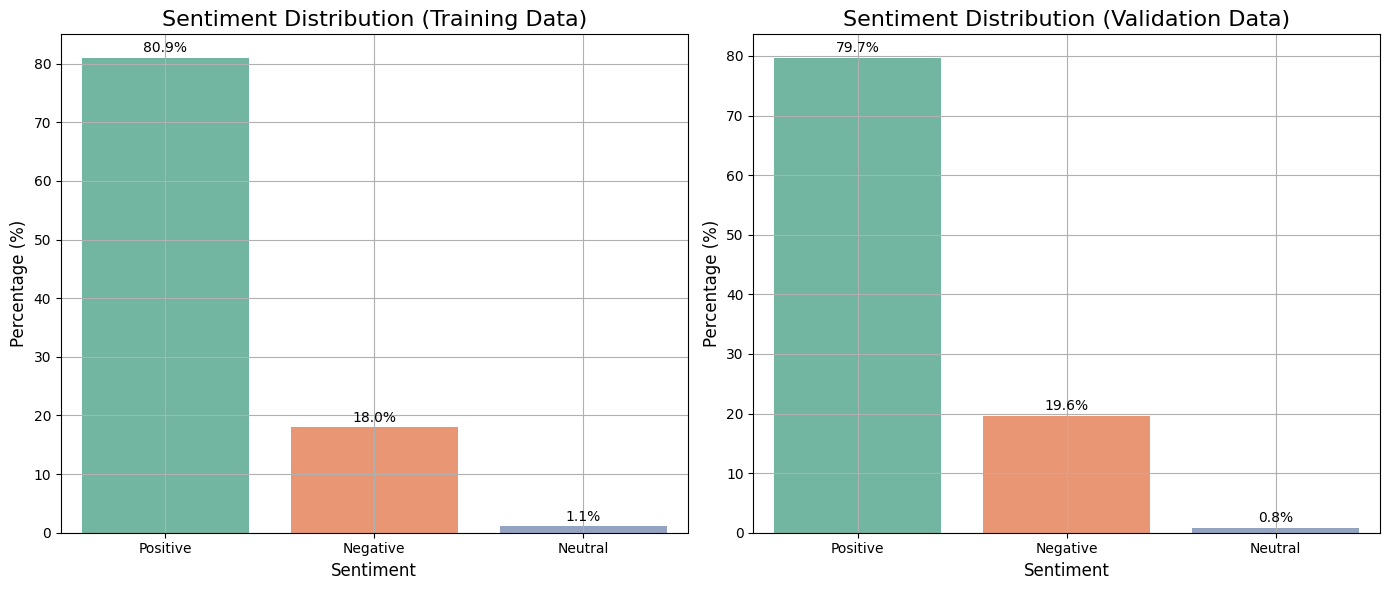

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Assuming 'train' and 'validation' are your DataFrames

# Calculate sentiment percentages for train and validation data
sentiment_counts_train = train['Sentiment'].value_counts(normalize=True) * 100
sentiment_counts_validation = validation['Sentiment'].value_counts(normalize=True) * 100

# Create a figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Adjusting the figure size

# Plot training data sentiment distribution
barplot_train = sns.barplot(x=sentiment_counts_train.index, y=sentiment_counts_train.values, ax=ax1, palette="Set2")
ax1.set_title('Sentiment Distribution (Training Data)', fontsize=16)
ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.grid(True)

# Add percentage labels on top of bars for training data
for p in barplot_train.patches:
    barplot_train.annotate(f'{p.get_height():.1f}%',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)

# Plot validation data sentiment distribution
barplot_validation = sns.barplot(x=sentiment_counts_validation.index, y=sentiment_counts_validation.values, ax=ax2, palette="Set2")
ax2.set_title('Sentiment Distribution (Validation Data)', fontsize=16)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_xlabel('Sentiment', fontsize=12)
ax2.grid(True)

# Add percentage labels on top of bars for validation data
for p in barplot_validation.patches:
    barplot_validation.annotate(f'{p.get_height():.1f}%',
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [8]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'train' is your DataFrame with the necessary columns: 'News Content', 'Entity', 'Sentiment'

# Filter the DataFrame to include rows where 'News Content' has less than 40 words
# and is not None
filtered_data = train[(train['News Content'].notna()) & (train['News Content'].apply(lambda x: len(str(x).split()) < 40))]

# Sample 5 random rows from the filtered data
data_sample = filtered_data[['News Content', 'Entity', 'Sentiment']].sample(n=5, random_state=1)

# Define colors for sentiment categories
color_map = {
    'Positive': 'green',
    'Neutral': 'orange',
    'Negative': 'red'
}

# Create a colorful table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_sample.columns),
        fill_color='paleturquoise',
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[data_sample[k].tolist() for k in data_sample.columns],
        fill_color=[
            'lightcyan',  # News Content
            'lightcyan',  # Entity
            [color_map.get(s, 'gray') for s in data_sample['Sentiment']]  # Sentiment column
        ],
        align='left',
        font=dict(color='black', size=11)
    ))
])

# Update the layout
fig.update_layout(
    title='Random 5 Rows of Training Data: News Content < 40 Words',
    width=1000,
    height=600,
)

fig.show()

In [10]:
import plotly.graph_objects as go

# Assuming 'validation' is your DataFrame with the necessary columns: 'News Content', 'Entity', 'Sentiment'

# Filter the DataFrame to include rows where 'News Content' has less than 40 words
filtered_validation = validation[validation['News Content'].apply(lambda x: len(x.split()) < 40)]

# Get the number of rows in the filtered DataFrame
num_rows = len(filtered_validation)

# Sample a maximum of 5 rows, or all rows if there are fewer than 5
sample_size = min(num_rows, 5)

# Sample random rows from the filtered validation data
data_test_sample = filtered_validation[['News Content', 'Entity', 'Sentiment']].sample(n=sample_size, random_state=1)

# Define colors for sentiment categories
color_map = {
    'Positive': 'green',
    'Neutral': 'orange',
    'Negative': 'red'
}

# Create a colorful table using Plotly for the sampled data
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_test_sample.columns),
        fill_color='paleturquoise',
        align='left',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[data_test_sample[k].tolist() for k in data_test_sample.columns],  # Show the sampled rows
        fill_color=[
            'lightcyan',  # News Content
            'lightcyan',  # Entity
            [color_map.get(s, 'lightgray') for s in data_test_sample['Sentiment']]  # Sentiment
        ],
        align='left',
        font=dict(color='black', size=11)
    ))
])

# Update the layout
fig.update_layout(
    title='Random 5 Rows of Validation Data: News Content < 40 Words',
    width=1000,
    height=600,
)

# Show the figure
fig.show()

# Optionally, save the figure as an HTML file
# fig.write_html("validation_data_sample.html")

Bert

In [11]:
%%time
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})
    return df['News Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(train)
test_texts, test_labels = preprocess_data(validation)

# Define the custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and datasets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'sentiment_model_BERT.pth')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.8880
Epoch 2/3, Test Accuracy: 0.9093
Epoch 3/3, Test Accuracy: 0.8967
CPU times: user 5min 16s, sys: 23.5 s, total: 5min 39s
Wall time: 5min 41s


In [12]:
!pip install scikit-learn
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# ... (rest of your code) ...

# Now you can use classification_report:
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.70      0.86      0.77       248
     Neutral       1.00      0.30      0.46        10
    Positive       0.96      0.91      0.93      1010

    accuracy                           0.90      1268
   macro avg       0.89      0.69      0.72      1268
weighted avg       0.91      0.90      0.90      1268



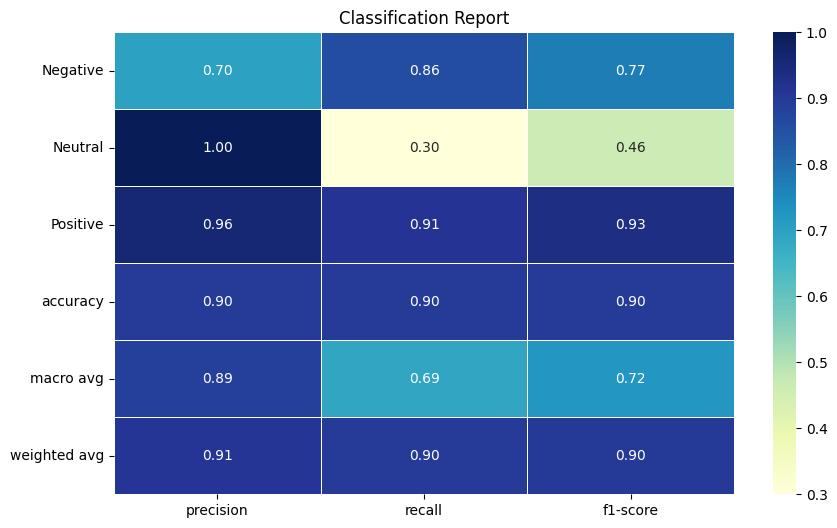

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the DataFrame using Seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Classification Report')
plt.show()


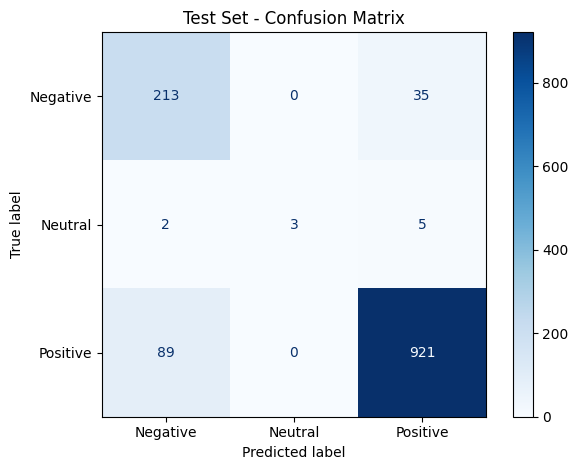

In [14]:
# Assuming test_true and test_preds are defined
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_BERT = confusion_matrix(test_true_encoded, test_preds, labels=labels)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_BERT, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

RoBERTa

In [15]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})
    return df['News Content'].tolist(), df['label'].tolist()

train_texts, train_labels = preprocess_data(train)
test_texts, test_labels = preprocess_data(validation)

# Define the custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and datasets for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Save the RoBERTa model
torch.save(model.state_dict(), 'sentiment_model_RoBERTa.pth')


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Test Accuracy: 0.8541
Epoch 2/3, Test Accuracy: 0.8983
Epoch 3/3, Test Accuracy: 0.8959


In [16]:
!pip install scikit-learn
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# ... (rest of your code) ...

# Now you can use classification_report:
print(classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.94      0.53      0.68       248
     Neutral       1.00      0.20      0.33        10
    Positive       0.89      0.99      0.94      1010

    accuracy                           0.90      1268
   macro avg       0.94      0.57      0.65      1268
weighted avg       0.90      0.90      0.88      1268



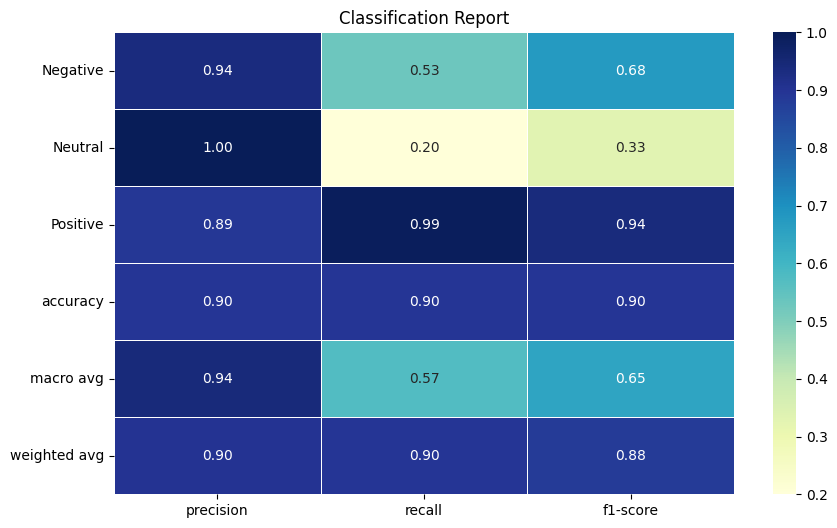

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(test_true, test_preds, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the DataFrame using Seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Classification Report')
plt.show()


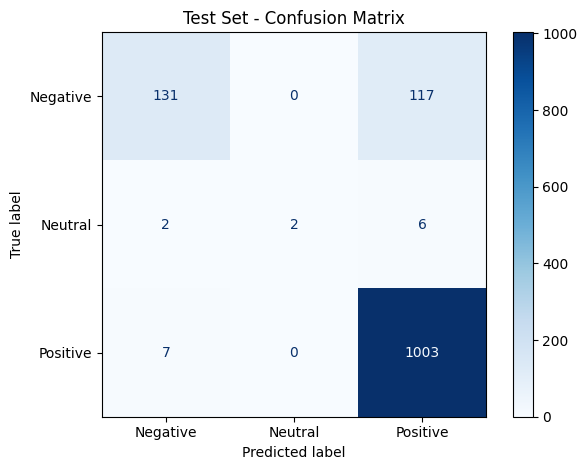

In [18]:
# Assuming test_true and test_preds are defined
from sklearn.metrics import confusion_matrix

# Check if test_true labels need conversion (optional)
if not isinstance(test_true[0], str):  # If labels are not strings
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    test_true_encoded = encoder.fit_transform(test_true)  # Encode labels
    labels = [0, 1, 2]  # Numerical labels
else:
    test_true_encoded = test_true
    labels = ['Negative', 'Neutral', 'Positive']  # String labels

# Calculate confusion matrix with consistent labels
confusion_matrix_BERT = confusion_matrix(test_true_encoded, test_preds, labels=labels)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = ['Negative', 'Neutral', 'Positive']  # String labels
test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_BERT, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [23]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGr

In [32]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM, AdamW
from sklearn.metrics import accuracy_score

# Use a pipeline as a high-level helper for text generation
pipe = pipeline("text-generation", model="meta-llama/Llama-3.2-1B", use_auth_token=True)

# Load model and tokenizer directly
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B", use_auth_token=True)  # Use the token for gated models
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B", use_auth_token=True)  # Use the token for gated models

# Set padding token
tokenizer.pad_token = tokenizer.eos_token  # Use EOS token as padding token

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})
    return df['News Content'].tolist(), df['label'].tolist()

# Assuming 'train' and 'validation' DataFrames are defined
# Replace with your actual DataFrame initialization
# train = pd.read_csv('train_data.csv') # Example of loading train data
# validation = pd.read_csv('validation_data.csv') # Example of loading validation data
train_texts, train_labels = preprocess_data(train)
test_texts, test_labels = preprocess_data(validation)

# Define the custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets and data loaders
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Reduced batch size from 16 to 8
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set up device and move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Debugging: Print shapes
        print(f"Input IDs shape: {input_ids.shape}, Attention mask shape: {attention_mask.shape}, Labels shape: {labels.shape}")

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'sentiment_model_Llama3_2.pth')
print("Model saved successfully.")

# Example text generation using the pipeline
prompt = "In the world of finance,"
generated_text = pipe(prompt, max_length=50, num_return_sequences=1)

print("Generated Text:")
for i, text in enumerate(generated_text):
    print(f"Text {i+1}: {text['generated_text']}")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


OutOfMemoryError: CUDA out of memory. Tried to allocate 1002.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 256.81 MiB is free. Process 202528 has 39.30 GiB memory in use. Of the allocated memory 38.70 GiB is allocated by PyTorch, and 112.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [34]:


import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import LlamaTokenizer, LlamaForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from torch.cuda.amp import GradScaler, autocast

# Preprocess the data
def preprocess_data(df):
    df['label'] = df['Sentiment'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})
    return df['News Content'].tolist(), df['label'].tolist()

# Assuming 'train' and 'validation' DataFrames are defined
train_texts, train_labels = preprocess_data(train)
test_texts, test_labels = preprocess_data(validation)

# Define the custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Load model and tokenizer
model_name = '/content/tokenizer.model'  # Path to the model on Hugging Face Hub
tokenizer = LlamaTokenizer.from_pretrained(model_name)
model = LlamaForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Create datasets and data loaders with a smaller batch size
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Reduced batch size
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set up device and move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Gradient accumulation
accumulation_steps = 4  # Adjust based on your needs
scaler = GradScaler()  # For mixed precision

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    for i, batch in enumerate(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with autocast():  # Mixed precision context
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        scaler.scale(loss).backward()  # Scale loss

        # Update weights every 'accumulation_steps' steps
        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)  # Update weights
            scaler.update()          # Update scaler
            optimizer.zero_grad()    # Clear gradients

    # Evaluation on test set
    model.eval()
    test_preds = []
    test_true = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            test_preds.extend(preds)
            test_true.extend(labels.cpu().numpy())

    accuracy = accuracy_score(test_true, test_preds)
    print(f'Epoch {epoch + 1}/{num_epochs}, Test Accuracy: {accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'sentiment_model_Llama3_2.pth')
print("Model saved successfully.")


OSError: Incorrect path_or_model_id: '/content/tokenizer.model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.